<a href="https://colab.research.google.com/github/shivam-kotwalia/data-science-project/blob/master/Face_Verification_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGGFace and VGGFace2 Models

The VGGFace refers to a series of models developed for face recognition and demonstrated on benchmark computer vision datasets by members of the Visual Geometry Group (VGG) at the University of Oxford.

There are two main VGG models for face recognition at the time of writing; they are VGGFace and VGGFace2. Let’s take a closer look at each in turn.

### keras-vggface - Model to classify image into celebs, use without top and get embedding also

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-tjak4vta
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-tjak4vta
  Stored in directory: /tmp/pip-ephem-wheel-cache-8izuiq83/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [2]:
! pip show keras-vggface

Name: keras-vggface
Version: 0.5
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, pyyaml, pillow, h5py, six, scipy, keras
Required-by: 


In [4]:
# check version of keras_vggface
import keras_vggface
# print version
print(keras_vggface.__version__)

0.5


###  Geting out Faces from Images 

In [5]:
! pip install mtcnn

     |████████████████████████████████| 2.3MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/85/81/65/6363fa5aafd7a155c896591e0c7c6e27b69642aa82b9cbf076
Successfully built mtcnn


In [18]:
import mtcnn
from mtcnn.mtcnn import MTCNN
# print version
print(mtcnn.__version__)

0.0.9


In [8]:
# Celeb Images 
! wget https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/celeb-hair-3-1549067654.jpg

--2019-06-05 04:56:39--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/celeb-hair-3-1549067654.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 821488 (802K) [image/jpeg]
Saving to: ‘celeb-hair-3-1549067654.jpg’

celeb-hair-3-154906 100%[===================>] 802.23K  --.-KB/s    in 0.08s   

2019-06-05 04:56:39 (10.4 MB/s) - ‘celeb-hair-3-1549067654.jpg’ saved [821488/821488]



In [0]:
from PIL import Image

In [0]:
celeb_image = Image.open("celeb-hair-3-1549067654.jpg")

In [12]:
celeb_image.width, celeb_image.height

(3000, 1500)

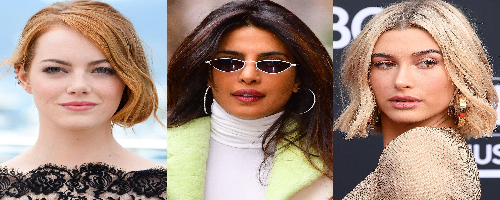

In [14]:
celeb_image.resize((500, 200))

In [20]:
face_detecttor = MTCNN()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [0]:
results = face_detecttor.detect_faces(np.array(celeb_image))

In [0]:
#The result is a list of bounding boxes, where each bounding box defines a 
#lower-left-corner of the bounding box, as well as the width and height.

In [28]:
len(results)

5

In [30]:
results[0], results[1], results[2], results[3], results[4]

({'box': [1256, 197, 502, 672],
  'confidence': 0.9999978542327881,
  'keypoints': {'left_eye': (1388, 470),
   'mouth_left': (1391, 708),
   'mouth_right': (1588, 722),
   'nose': (1487, 590),
   'right_eye': (1622, 483)}},
 {'box': [144, 215, 608, 737],
  'confidence': 0.9999825954437256,
  'keypoints': {'left_eye': (337, 527),
   'mouth_left': (352, 785),
   'mouth_right': (588, 788),
   'nose': (475, 668),
   'right_eye': (608, 528)}},
 {'box': [2190, 186, 531, 737],
  'confidence': 0.9973714351654053,
  'keypoints': {'left_eye': (2316, 479),
   'mouth_left': (2332, 761),
   'mouth_right': (2538, 755),
   'nose': (2410, 624),
   'right_eye': (2560, 468)}},
 {'box': [89, 1315, 19, 21],
  'confidence': 0.8004685044288635,
  'keypoints': {'left_eye': (96, 1322),
   'mouth_left': (96, 1330),
   'mouth_right': (102, 1330),
   'nose': (99, 1326),
   'right_eye': (103, 1322)}},
 {'box': [181, 1289, 21, 26],
  'confidence': 0.7638182044029236,
  'keypoints': {'left_eye': (191, 1296),
   'm

In [44]:
cord = {}
for index, i in enumerate(results):
  x1, y1, width, height = i.get("box")
  x2, y2 = x1 + width, y1 + height
  cord[index] = [x1, y1, x2, y2]
cord

{0: [1256, 197, 1758, 869],
 1: [144, 215, 752, 952],
 2: [2190, 186, 2721, 923],
 3: [89, 1315, 108, 1336],
 4: [181, 1289, 202, 1315]}

In [47]:
cropped_images = []
for i in cord.values():
  x1, y1, x2, y2 = i
  print(x1, y1, x2, y2)
cropped_images.append(np.array(celeb_image)[y1:y2, x1:x2])

1256 197 1758 869
144 215 752 952
2190 186 2721 923
89 1315 108 1336
181 1289 202 1315


In [48]:


# plt.imshow(cropped_images[3])

array([[[181, 217, 249],
        [181, 217, 249],
        [181, 217, 249],
        ...,
        [ 51,  53,  66],
        [ 51,  53,  66],
        [ 51,  53,  66]],

       [[182, 218, 250],
        [182, 218, 250],
        [182, 218, 250],
        ...,
        [ 50,  52,  65],
        [ 51,  53,  66],
        [ 51,  53,  66]],

       [[183, 219, 251],
        [183, 219, 251],
        [183, 219, 251],
        ...,
        [ 49,  51,  64],
        [ 49,  51,  64],
        [ 50,  52,  65]],

       ...,

       [[123,  99,  89],
        [126, 102,  92],
        [136, 113, 105],
        ...,
        [ 43,  45,  58],
        [ 43,  45,  58],
        [ 43,  45,  58]],

       [[134, 112, 101],
        [138, 115, 107],
        [150, 127, 119],
        ...,
        [ 43,  45,  58],
        [ 43,  45,  58],
        [ 43,  45,  58]],

       [[136, 113, 105],
        [141, 118, 110],
        [151, 131, 124],
        ...,
        [ 43,  45,  58],
        [ 43,  45,  58],
        [ 43,  45,  58]]